In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
plt.style.use('seaborn')

In [2]:
data17 = pd.read_csv('TViMS_2017.csv', header = 0, sep = ';')

In [3]:
data17 

,uid,last_name,first_name,middle_name,group,kr1_total,kr2_total,kr3_sum,k4,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,100.0,Агамогланова,Сабина,Гаджиага кызы,БЭК171,20.0,30.0,61.0,59.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101.0,Александров,Вячеслав,Сергеевич,БЭК171,30.0,75.0,53.0,54.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102.0,Аюшеева,Марина,Александровна,БЭК171,30.0,58.0,73.0,44.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103.0,Бакуева,Дженнет,Аминовна,БЭК171,20.0,58.0,86.0,60.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104.0,Бекзентеев,Марк,Рустамович,БЭК171,40.0,95.0,100.0,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data17 = data17[['last_name','first_name','middle_name','group','kr1_total','kr2_total','kr3_sum','k4']]

In [5]:
data17.drop(np.arange(326,347), inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
data17.describe() 

,kr1_total,kr2_total,kr3_sum,k4
count,317.000000,317.000000,326.000000,326.000000
mean,45.599369,49.867666,43.692485,49.296012
std,21.611830,23.338216,29.467739,30.265628
min,0.000000,0.000000,0.000000,0.000000
25%,30.000000,30.000000,15.000000,27.000000
50%,52.000000,54.000000,49.000000,52.000000
75%,60.000000,67.000000,68.000000,74.000000
max,100.000000,95.000000,100.000000,100.000000


Видим, что в целом контрольные работы в прошлом году были более-менее равнозначные.

In [7]:
mean_1_17 = data17['kr1_total'].mean()
mean_2_17 = data17['kr2_total'].mean()
data17['kr1_total'].fillna(value = mean_1_17, inplace=True)
data17['kr2_total'].fillna(value = mean_2_17, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Чтобы исследование и графики построились, заполним пропуски (людей, которые не писали КР1 и КР2) средними
значениями по этим контрольным работам. Так они не должны выбиваться, но если что, то обязательно отсеим

In [8]:
data17

,last_name,first_name,middle_name,group,kr1_total,kr2_total,kr3_sum,k4
0,Агамогланова,Сабина,Гаджиага кызы,БЭК171,20.000000,30.000000,61.0,59.0
1,Александров,Вячеслав,Сергеевич,БЭК171,30.000000,75.000000,53.0,54.0
2,Аюшеева,Марина,Александровна,БЭК171,30.000000,58.000000,73.0,44.0
3,Бакуева,Дженнет,Аминовна,БЭК171,20.000000,58.000000,86.0,60.0
4,Бекзентеев,Марк,Рустамович,БЭК171,40.000000,95.000000,100.0,100.0
...,...,...,...,...,...,...,...,...
321,Мидова,Эльвира,NaN,БЭК1712,45.599369,49.867666,15.0,18.0
322,Колесник,Дмитрий,NaN,БЭК177,45.599369,49.867666,15.0,0.0
323,Некрасов,Сергей,NaN,БЭК179,45.599369,49.867666,15.0,0.0
324,Устинов,Дмитрий,NaN,БЭК178,45.599369,49.867666,15.0,20.0


In [9]:
first_semester_2017 = (data17['kr1_total'].values + data17['kr2_total'].values) / 2
second_semester_2017 = (data17['kr3_sum'].values + data17['k4'].values) / 2

In [11]:
len(first_semester_2017) == len(second_semester_2017)

True

In [13]:
tan_17, c_17, rvalue_17, pvalue_17, stderr_17 = ss.linregress(first_semester_2017, second_semester_2017)

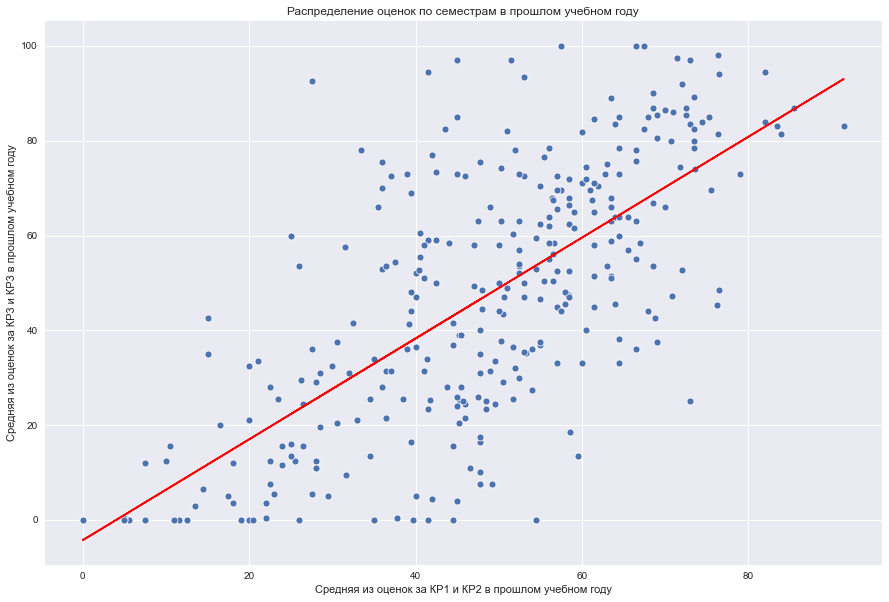

In [44]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.scatterplot(first_semester_2017, second_semester_2017)
ax.set_xlabel('Средняя из оценок за КР1 и КР2 в прошлом учебном году')
ax.set_ylabel('Средняя из оценок за КР3 и КР3 в прошлом учебном году')
ax.set_title('Распределение оценок по семестрам в прошлом учебном году')
plt.plot(first_semester_2017, c_17 + tan_17*first_semester_2017, 'r')
plt.show()

In [16]:
tan_17

1.063292752586364

In [17]:
c_17

-4.260454587620515

Здесь tan - тангенс прямой, а "с" - константа (т.е. y = tan*x + c). В дальнейшем планируем сравнить его с показателем в нашем году. В принципе, из графика в принципе понятно что за второй семестр люди в прошлом году получали оценку за контрольные чуть меньше, нежели чем за первый. Запомним :)

In [18]:
data18 = pd.read_csv('TViMS_2018.csv', sep = ';')
data18 = data18[['last_name','first_name','middle_name','group','kr1_sum','kr2_sum','КР3','кр4']]
data18.drop(0, inplace=True)
data18.drop(np.arange(398, 449), inplace=True)
data18

,last_name,first_name,middle_name,group,kr1_sum,kr2_sum,КР3,кр4
1,Алиев,Эльнур,Гашимович,БЭК181,25.0,82.0,78.0,07.июнь
2,Алтунина,Анастасия,Игоревна,БЭК181,97.0,74.0,70.0,09.сент
3,Байкалова,Дарья,Александровна,БЭК181,99.0,76.0,87.0,09.май
4,Антипина,Екатерина,Дмитриевна,БЭК184,56.0,35.0,59.0,06.февр
5,Васьков,Алексей,Васильевич,БЭК181,88.0,58.0,56.0,0.0
...,...,...,...,...,...,...,...,...
393,Чигирёва,Дарья,Алексеевна,БЭК189,66.0,61.0,56.0,04.сент
394,Чубаров,Михаил,Юрьевич,БЭК189,78.0,70.0,81.0,05.май
395,Швецова,Полина,Алексеевна,БЭК189,75.0,45.0,66.0,05.май
396,Шереметьев,Даниил,Михайлович,БЭК189,30.0,54.0,21.0,05.май


In [19]:
def changing(col):
    try:
        mark = float(col)
    except:
        l = col.split('.')
        l[0] = str(int(l[0]))
        if l[1] == 'янв':
            l[1] = '1'
        elif l[1] == 'февр':
            l[1] = '2'
        elif l[1] == 'март':
            l[1] = '3'
        elif l[1] == 'апр':
            l[1] = '4'
        elif l[1] == 'май':
            l[1] = '5'
        elif l[1] == 'июнь':
            l[1] = '6'
        elif l[1] == 'июль':
            l[1] = '7'
        elif l[1] == 'авг':
            l[1] = '8'
        elif l[1] == 'сент':
            l[1] = '9'
        mark = float('.'.join(l))
    return mark

In [20]:
data18['кр4'] = data18['кр4'].apply(changing)

In [21]:
data18['кр4'] = data18['кр4'] * 10
data18

,last_name,first_name,middle_name,group,kr1_sum,kr2_sum,КР3,кр4
1,Алиев,Эльнур,Гашимович,БЭК181,25.0,82.0,78.0,76.0
2,Алтунина,Анастасия,Игоревна,БЭК181,97.0,74.0,70.0,99.0
3,Байкалова,Дарья,Александровна,БЭК181,99.0,76.0,87.0,95.0
4,Антипина,Екатерина,Дмитриевна,БЭК184,56.0,35.0,59.0,62.0
5,Васьков,Алексей,Васильевич,БЭК181,88.0,58.0,56.0,0.0
...,...,...,...,...,...,...,...,...
393,Чигирёва,Дарья,Алексеевна,БЭК189,66.0,61.0,56.0,49.0
394,Чубаров,Михаил,Юрьевич,БЭК189,78.0,70.0,81.0,55.0
395,Швецова,Полина,Алексеевна,БЭК189,75.0,45.0,66.0,55.0
396,Шереметьев,Даниил,Михайлович,БЭК189,30.0,54.0,21.0,55.0


In [22]:
data18.describe()

,kr1_sum,kr2_sum,КР3,кр4
count,395.000000,397.000000,397.000000,394.000000
mean,52.060506,37.637280,51.675063,51.347716
std,28.907291,25.592833,24.700380,25.015790
min,0.000000,0.000000,0.000000,0.000000
25%,25.000000,15.000000,38.000000,39.000000
50%,57.000000,39.000000,56.000000,54.000000
75%,75.600000,59.000000,71.000000,68.000000
max,100.000000,100.000000,96.000000,100.000000


Что мы видим? В этом году КР2 была сильно сложнее, чем в прошлом, но и КР1 была проще. За счет этого
они скомпенсировали друг друга. Однако, самое интересное начинается во 2 семестре: смотрим на 25% квантиль и оказывается, что он на 12 - 20 баллов выше! С медианой дела обстоят получше: выше на пару баллов. С 75% особых изменений не произошло, даже наоборот, чуть меньше стали показатели.

In [23]:
mean_1_18 = data18['kr1_sum'].mean()
mean_2_18 = data18['kr2_sum'].mean()
mean_3_18 = data18['КР3'].mean()
mean_4_18 = data18['кр4'].mean()

#Я заполняю пропуски средними баллами.

data18['kr1_sum'].fillna(value = mean_1_18, inplace=True)
data18['kr2_sum'].fillna(value = mean_2_18, inplace=True)
data18['КР3'].fillna(value = mean_3_18, inplace=True)
data18['кр4'].fillna(value = mean_4_18, inplace=True)


first_semester_2018 = (data18['kr1_sum'].values + data18['kr2_sum'].values) / 2
second_semester_2018 = (data18['КР3'].values + data18['кр4'].values) / 2

In [24]:
first_semester_2018.mean()

44.84889296304563

In [26]:
first_semester_2017.mean()

47.73351735015773

В среднем, в прошлом году за две контрольные работы студенты получали оценку на 3 балла выше в первом семестре, нежели чем в этом году

In [27]:
second_semester_2018.mean()

51.511389354166404

In [28]:
second_semester_2017.mean()

46.494248466257666

А во втором семестре в среднем студенты получали оценку на 5 баллов выше, нежели чем в прошлом году

In [29]:
tan_18, c_18, rvalue_18, pvalue_18, stderr_18 = ss.linregress(first_semester_2018, second_semester_2018)

In [30]:
tan_18

0.6828961442662944

In [31]:
c_18

20.8842532750908

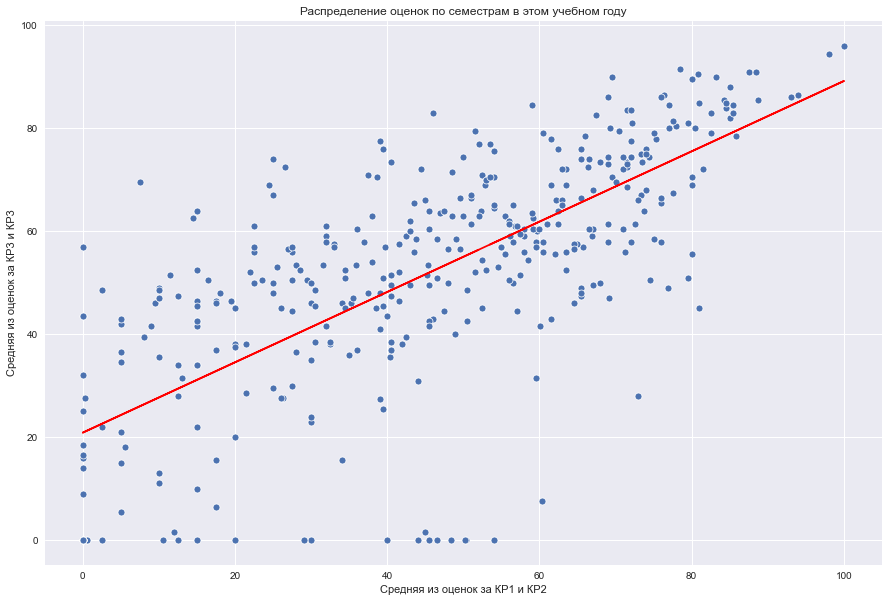

In [42]:
fig, ax = plt.subplots(figsize = (15,10))
sns.scatterplot(first_semester_2018, second_semester_2018, ax = ax)
ax.set_xlabel('Средняя из оценок за КР1 и КР2')
ax.set_ylabel('Средняя из оценок за КР3 и КР3')
ax.set_title('Распределение оценок по семестрам в этом учебном году')
plt.plot(first_semester_2018, c_18 + tan_18*first_semester_2018, 'r', label='fitted line')
plt.show()

Что видим теперь? Линейная регрессия показала, что если мы получили 0 за среднее из КР1 и КР2, то получим 20 баллов
за среднее из КР3 и КР4. Это довольно интересно, и видно, как сильно поднялись баллы в связи с переходом на дистанционное обучение.

Посмотрев на этот график, сразу можно увидеть несколько интересных моментов: кто-то писал очень плохо кр в 1 семестре (0 - 30 баллов), а во 2 семестре неожиданно начал(а) писать на 60 - 80

In [33]:
data18['first_semester'] = first_semester_2018
data18['second_semester'] = second_semester_2018

In [35]:
data18[(data18['first_semester'] < 40) & (data18['second_semester'] > 60)]

,last_name,first_name,middle_name,group,kr1_sum,kr2_sum,КР3,кр4,first_semester,second_semester
11,Кучумова,Милана,Анатольевна,БЭК181,25.0,24.0,65.0,73.0,24.5,69.0
61,Колесова,Нина,Дмитриевна,БЭК1811,45.0,0.0,71.0,51.0,22.5,61.0
72,Рублев,Юрий,Алексеевич,БЭК1811,47.4,30.0,77.0,64.0,38.7,70.5
111,Дергачева,Анна,Леонтьевна,БЭК1813,30.0,49.0,64.0,88.0,39.5,76.0
114,Крижевич,Олеся,Станиславовна,БЭК1813,39.0,33.0,53.0,68.0,36.0,60.5
117,Макарычева,Анастасия,Артемьевна,БЭК1813,47.0,28.0,57.0,85.0,37.5,71.0
118,Максаков,Глеб,Сергеевич,БЭК1813,10.0,40.0,78.0,70.0,25.0,74.0
128,Сергеев,Даниил,Алексеевич,БЭК1813,10.0,20.0,76.0,52.0,15.0,64.0
132,Чикин,Сергей,Сергеевич,БЭК1813,15.0,0.0,76.0,63.0,7.5,69.5
154,Рашалиев,Атай,Нурланович,БЭК1814,30.0,20.0,76.0,58.0,25.0,67.0


В принципе, показатели сверху можно регулировать. Первая цифра - то, сколько в среднем студент получил за две КР
в первом семестре, вторая - средняя из кр3 и кр4 во втором. 

Безусловно, данный метод не оценивает некоторых студентов (например, с ИУПом, что является даже более интересным предметом изучения). Поэтому не все совершенно. Такое уже стоит смотреть вручную

Вот что делает дистанционка!